## [MCU Worldwide Box Office Collection 데이터 분석 02] 
 * [생활-영화] Marvel Cinematic Universe 전세계 박스 오피스 컬렉션 데이터 세트
 * 지역별 모든 박스 오피스 컬렉션 정보
 * 데이터 출처 : https://www.kaggle.com/datasets/mayureshkoli/mcu-worldwide-box-office-collection
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/01_11_MCU_MOVIE_INFO.ipynb)
   * [HTML코드 - 시작](https://ldjwj.github.io/dataAnalysis/01_11_MCU_MOVIE_INFO.html)
   * [HTML코드 - 전처리및탐색](https://ldjwj.github.io/dataAnalysis/01_11_MCU_MOVIE_INFO_02.html)

### 학습 내용
 * 관객수 시각화 - boxplot, histgram
 * 시각화를 위한 기본 데이터 처리 - sum(), sort_values()

### 데이터 셋 개요
 * 6개의 데이터 셋이 존재
 * 데이터 파일
   * movie_info.csv : 영화 정보
   * asia_pacific_box_office.csv : 아시아 지역
   * europe_box_office.csv : 유럽 지역
   * middle_east_and_africa_box_office.csv : 중동, 아프리카 지역
   * north_america_box_office.csv : 북미 지역
   * south_america_box_office.csv : 남미 지역

### 데이터 설명

* Input/output variables 

### 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [2]:
mov_info = pd.read_csv("./data/Marvel/movie_info.csv")
asia_info = pd.read_csv("./data/Marvel/asia_pacific_box_office.csv")
europe_info = pd.read_csv("./data/Marvel/europe_box_office.csv")
middle_east_info = pd.read_csv("./data/Marvel/middle_east_and_africa_box_office.csv")
north_america_info = pd.read_csv("./data/Marvel/north_america_box_office.csv")
south_america_info = pd.read_csv("./data/Marvel/south_america_box_office.csv")

mov_info.shape, asia_info.shape, europe_info.shape, middle_east_info.shape, north_america_info.shape, south_america_info.shape

((27, 11), (27, 17), (27, 31), (27, 13), (27, 5), (27, 12))

In [3]:
mov_info.head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score
0,Iron Man,"May 2, 2008",Spring,1,140,585.37,9.4,9.1,7.9,7.9,8.6
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0
2,Iron Man 2,"May 7, 2010",Spring,1,200,623.93,7.2,7.1,6.9,5.7,6.4
3,Thor,"May 6, 2011",Spring,1,150,449.33,7.7,7.6,7.0,5.7,7.1
4,Captain America: The First Avenger,"July 22, 2011",Summer,1,140,370.57,7.9,7.5,6.9,6.6,6.8


In [4]:
print( asia_info.head(3), end="\n\n" )
print( europe_info.head(3), end="\n\n" )
print( middle_east_info.head(3), end="\n\n" )
print( north_america_info.head(3), end="\n\n" )
print( south_america_info.head(3), end="\n\n" )

           movie_title  South Korea  Russia/CIS  Japan  Thailand  Indonesia  \
0             Iron Man        25.17        9.49   8.66      2.45       2.15   
1  The Incredible Hulk         6.38        6.41   1.69      1.18       1.50   
2           Iron Man 2        27.10       14.76  12.83      4.62       4.49   

   India  Taiwan  Philippines  Singapore  Vietnam  Malaysia  Hong Kong  \
0   1.99    5.37         3.99       3.82      NaN      3.47       2.84   
1   3.14    1.94         2.07       1.84     0.16      2.28       1.60   
2   1.23    4.04         6.25       4.19      NaN      4.64       3.76   

   New Zealand  Australia  China  Other_Asia_Pacific_Countries  
0         2.73      19.09  15.27                          1.37  
1         0.88       4.55   9.34                          0.70  
2         2.70      22.42   7.92                          6.57  

           movie_title  United Kingdom  Spain  Italy  Germany  Denmark  \
0             Iron Man           34.28  12.03  10.8

In [5]:
asia_info.head()

,movie_title,South Korea,Russia/CIS,Japan,Thailand,Indonesia,India,Taiwan,Philippines,Singapore,Vietnam,Malaysia,Hong Kong,New Zealand,Australia,China,Other_Asia_Pacific_Countries
0,Iron Man,25.17,9.49,8.66,2.45,2.15,1.99,5.37,3.99,3.82,NaN,3.47,2.84,2.73,19.09,15.27,1.37
1,The Incredible Hulk,6.38,6.41,1.69,1.18,1.50,3.14,1.94,2.07,1.84,0.16,2.28,1.60,0.88,4.55,9.34,0.70
2,Iron Man 2,27.10,14.76,12.83,4.62,4.49,1.23,4.04,6.25,4.19,NaN,4.64,3.76,2.70,22.42,7.92,6.57
3,Thor,14.79,16.54,5.74,2.32,0.27,1.00,5.83,4.03,4.25,NaN,3.73,2.49,1.90,20.14,NaN,5.29
4,Captain America: The First Avenger,3.81,8.64,3.43,2.48,2.05,0.12,6.32,3.58,3.56,0.60,3.00,2.50,1.47,11.11,NaN,3.84


### 시각화

(array([3., 5., 5., 5., 2., 4., 1., 1., 0., 1.]),
 array([  3.81 ,  13.977,  24.144,  34.311,  44.478,  54.645,  64.812,
         74.979,  85.146,  95.313, 105.48 ]),
 <BarContainer object of 10 artists>)

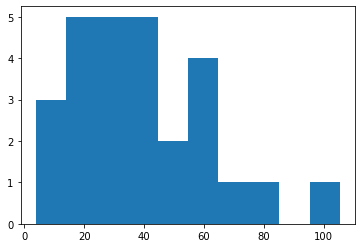

In [7]:
# 한국의 수치 히스토그램
plt.hist(asia_info['South Korea'])

In [9]:
asia_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   movie_title                   27 non-null     object 
 1   South Korea                   27 non-null     float64
 2   Russia/CIS                    27 non-null     float64
 3   Japan                         27 non-null     float64
 4   Thailand                      27 non-null     float64
 5   Indonesia                     20 non-null     float64
 6   India                         26 non-null     float64
 7   Taiwan                        23 non-null     float64
 8   Philippines                   25 non-null     float64
 9   Singapore                     26 non-null     float64
 10  Vietnam                       13 non-null     float64
 11  Malaysia                      27 non-null     float64
 12  Hong Kong                     27 non-null     float64
 13  New Zea

### 아시아 국가의 관객수를 시각화 해보자.

### 관객수를 전부 더해서 마지막 행 더하기

In [35]:
dat = asia_info.sum()
dat

movie_title                     Iron ManThe Incredible HulkIron Man 2ThorCapta...
South Korea                                                               1058.58
Russia/CIS                                                                 601.31
Japan                                                                      459.46
Thailand                                                                   183.87
Indonesia                                                                   225.3
India                                                                      303.99
Taiwan                                                                      256.8
Philippines                                                                227.72
Singapore                                                                  163.31
Vietnam                                                                     37.21
Malaysia                                                                   210.73
Hong Kong       

In [36]:
dat.index

Index(['movie_title', 'South Korea', 'Russia/CIS', 'Japan', 'Thailand',
       'Indonesia', 'India', 'Taiwan', 'Philippines', 'Singapore', 'Vietnam',
       'Malaysia', 'Hong Kong', 'New Zealand', 'Australia', 'China',
       'Other_Asia_Pacific_Countries'],
      dtype='object')

In [37]:
### 1행부터 끝까지
dat = dat.iloc[1:]
dat

South Korea                     1058.58
Russia/CIS                       601.31
Japan                            459.46
Thailand                         183.87
Indonesia                         225.3
India                            303.99
Taiwan                            256.8
Philippines                      227.72
Singapore                        163.31
Vietnam                           37.21
Malaysia                         210.73
Hong Kong                         248.6
New Zealand                       90.75
Australia                        683.18
China                           3029.94
Other_Asia_Pacific_Countries     199.44
dtype: object

In [38]:
dat.sort_values(ascending=False)

China                           3029.94
South Korea                     1058.58
Australia                        683.18
Russia/CIS                       601.31
Japan                            459.46
India                            303.99
Taiwan                            256.8
Hong Kong                         248.6
Philippines                      227.72
Indonesia                         225.3
Malaysia                         210.73
Other_Asia_Pacific_Countries     199.44
Thailand                         183.87
Singapore                        163.31
New Zealand                       90.75
Vietnam                           37.21
dtype: object

### 관객수 많은 5개국을 boxplot 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x209dcc5dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x209dcc78490>,
 'boxes': [<matplotlib.lines.Line2D at 0x209dcc5db50>,
 'medians': [<matplotlib.lines.Line2D at 0x209dcc78b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x209dcc78eb0>,
 'means': []}

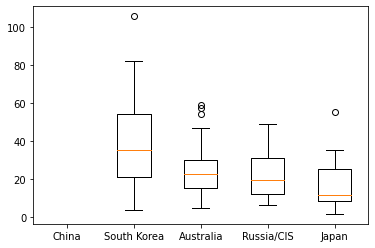

In [39]:
plt.boxplot( [asia_info['China'], asia_info['South Korea'], 
              asia_info['Australia'], asia_info['Russia/CIS'], 
              asia_info['Japan'] ],
             labels=['China', 'South Korea', 'Australia', 'Russia/CIS', 'Japan'])

* china는 결측치가 있어 표시가 되지 않음.

### movie info를 이용한 선형회귀 모델 구축

In [7]:
mov_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   movie_title                            27 non-null     object 
 1   release_date                           27 non-null     object 
 2   season                                 27 non-null     object 
 3   phase                                  27 non-null     int64  
 4   production_budget_in_million_(USD)     27 non-null     int64  
 5   worldwide_collection_in_million_(USD)  27 non-null     float64
 6   tomatometer                            27 non-null     float64
 7   tomato_audience_score                  27 non-null     float64
 8   imdb                                   27 non-null     float64
 9   metascore                              27 non-null     float64
 10  meta_user_score                        27 non-null     float64
dtypes: float

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
mov_info.head()

,movie_title,release_date,season,phase,production_budget_in_million_(USD),worldwide_collection_in_million_(USD),tomatometer,tomato_audience_score,imdb,metascore,meta_user_score
0,Iron Man,"May 2, 2008",Spring,1,140,585.37,9.4,9.1,7.9,7.9,8.6
1,The Incredible Hulk,"June 13, 2008",Spring,1,150,264.77,6.7,7.0,6.6,6.1,7.0
2,Iron Man 2,"May 7, 2010",Spring,1,200,623.93,7.2,7.1,6.9,5.7,6.4
3,Thor,"May 6, 2011",Spring,1,150,449.33,7.7,7.6,7.0,5.7,7.1
4,Captain America: The First Avenger,"July 22, 2011",Summer,1,140,370.57,7.9,7.5,6.9,6.6,6.8


* meta_user_score 사용자 예측 모델

In [10]:
mov_info.columns

Index(['movie_title', 'release_date', 'season', 'phase',
       'production_budget_in_million_(USD)',
       'worldwide_collection_in_million_(USD)', 'tomatometer',
       'tomato_audience_score', 'imdb', 'metascore', 'meta_user_score'],
      dtype='object')

In [11]:
sel = [ 'production_budget_in_million_(USD)',
       'worldwide_collection_in_million_(USD)', 'tomatometer',
       'tomato_audience_score', 'imdb', 'metascore'  ]

X = mov_info[sel]
y = mov_info['meta_user_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((24, 6), (3, 6))

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print( model.score(X_test, y_test) )

-0.7185104879973476


In [13]:
### MSE 구하기
np.mean(  (pred - y_test)**2 )

0.5613800927457998

In [14]:
### MAE 구하기
np.mean(  np.abs(pred - y_test) )

0.47688356031118584